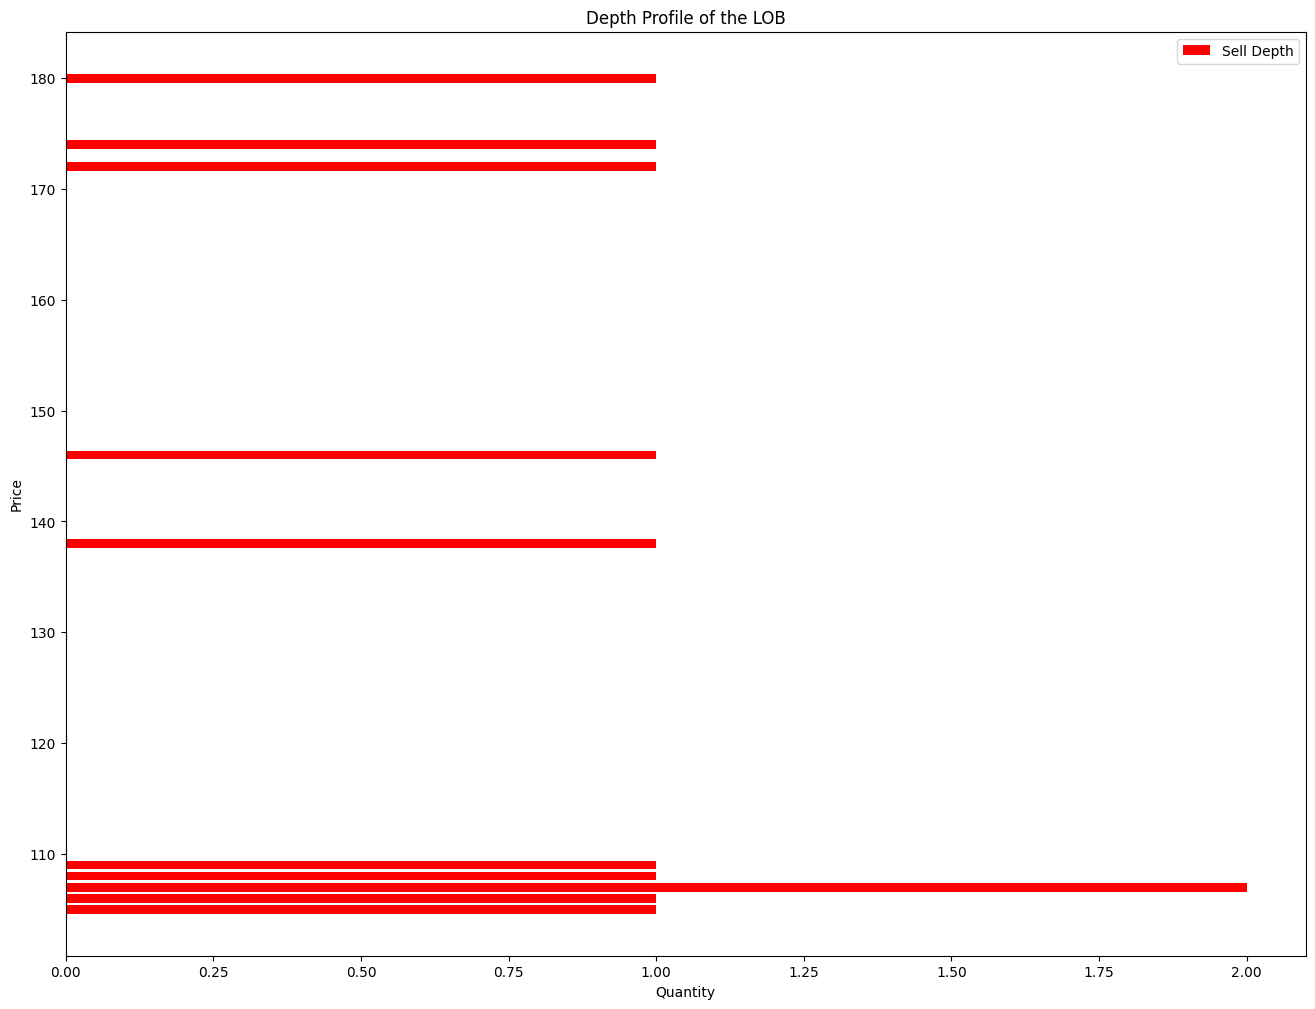

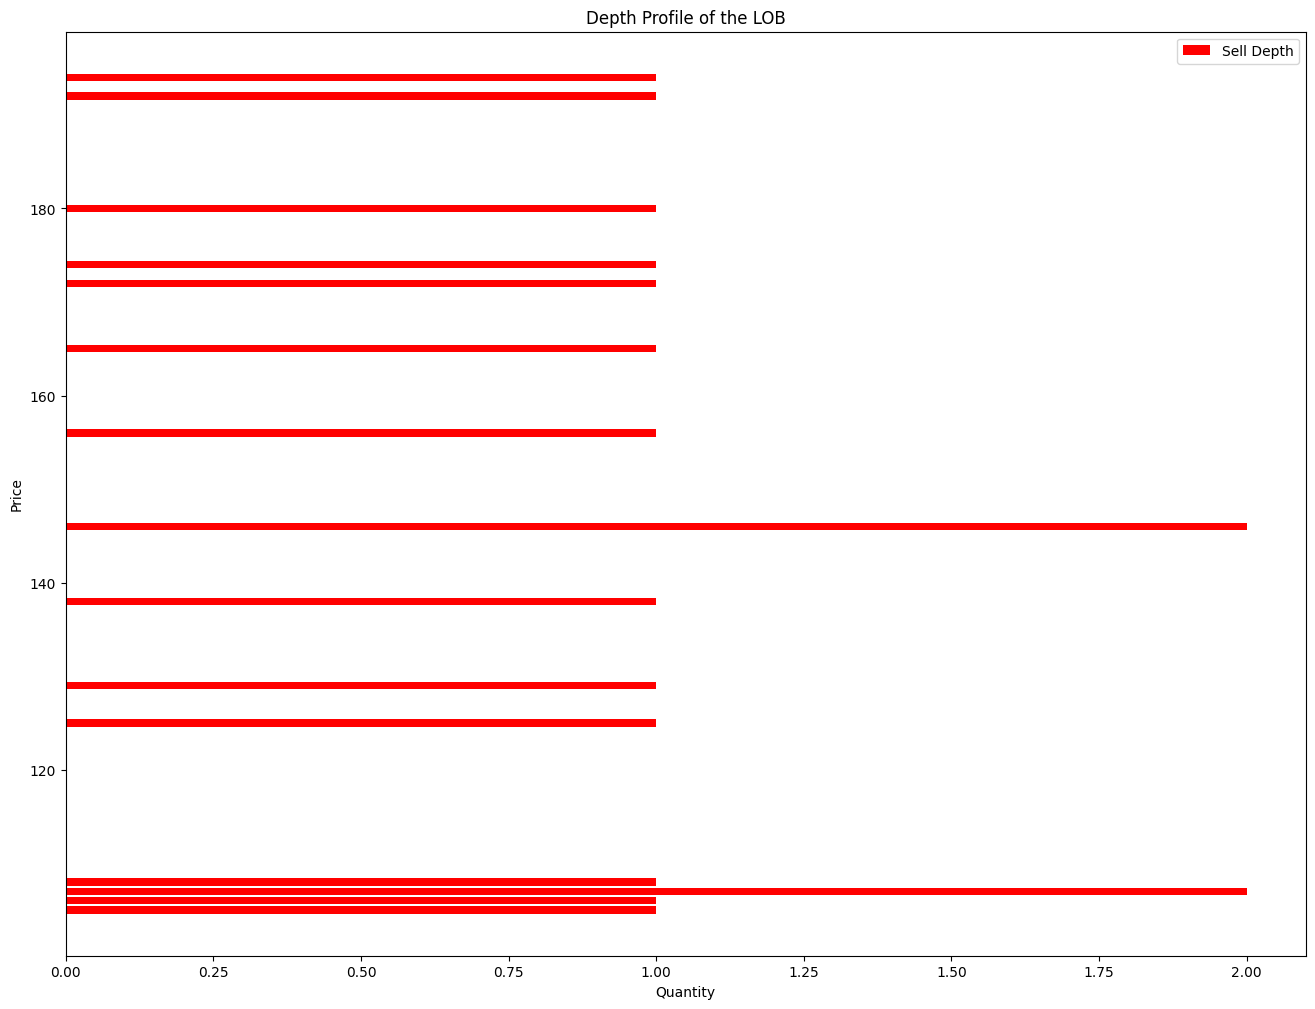

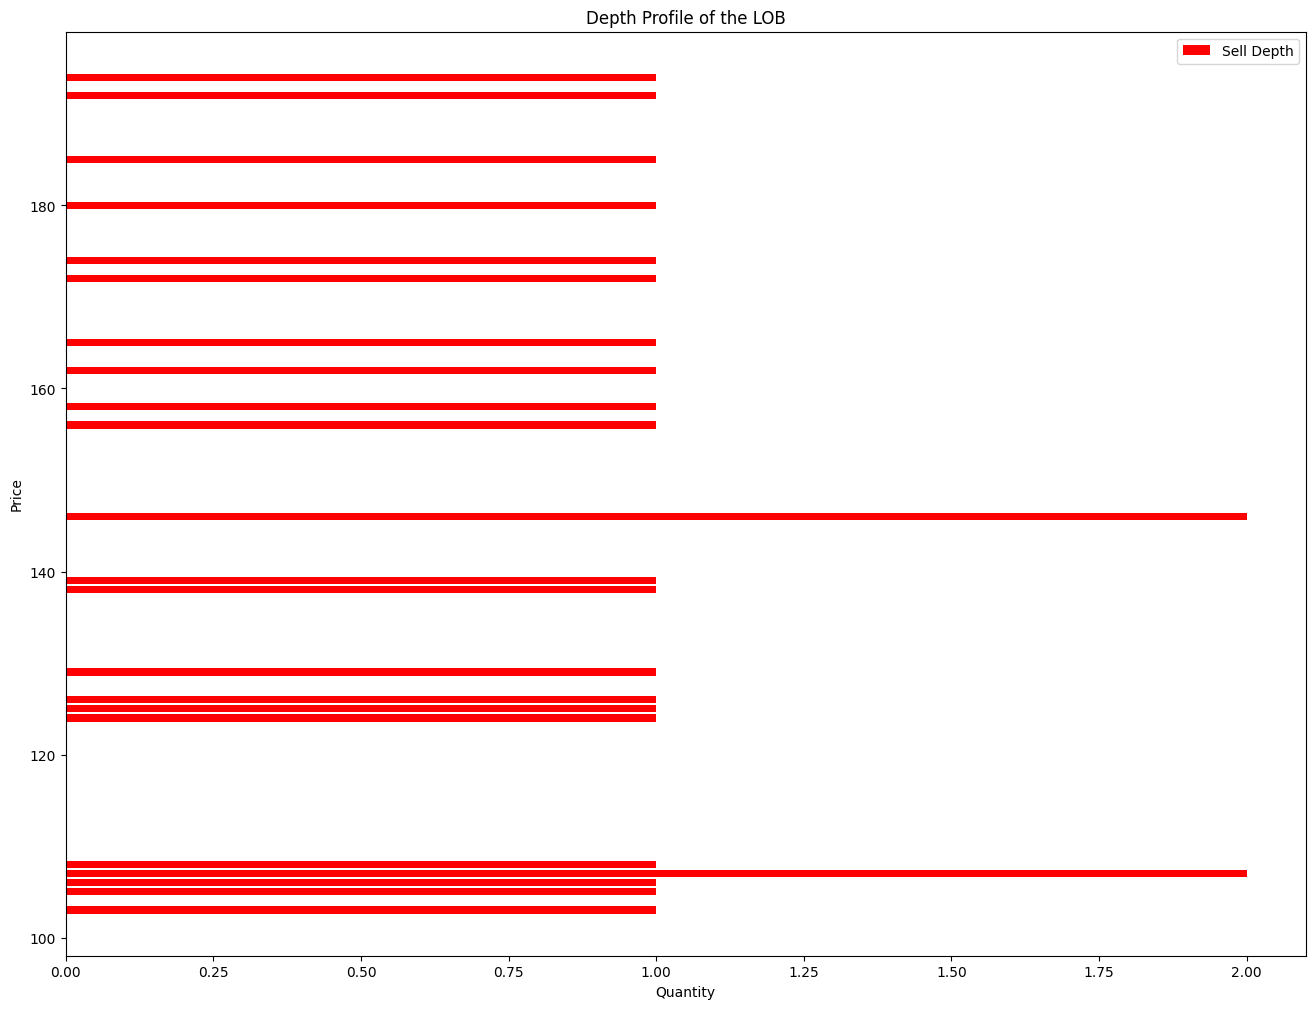

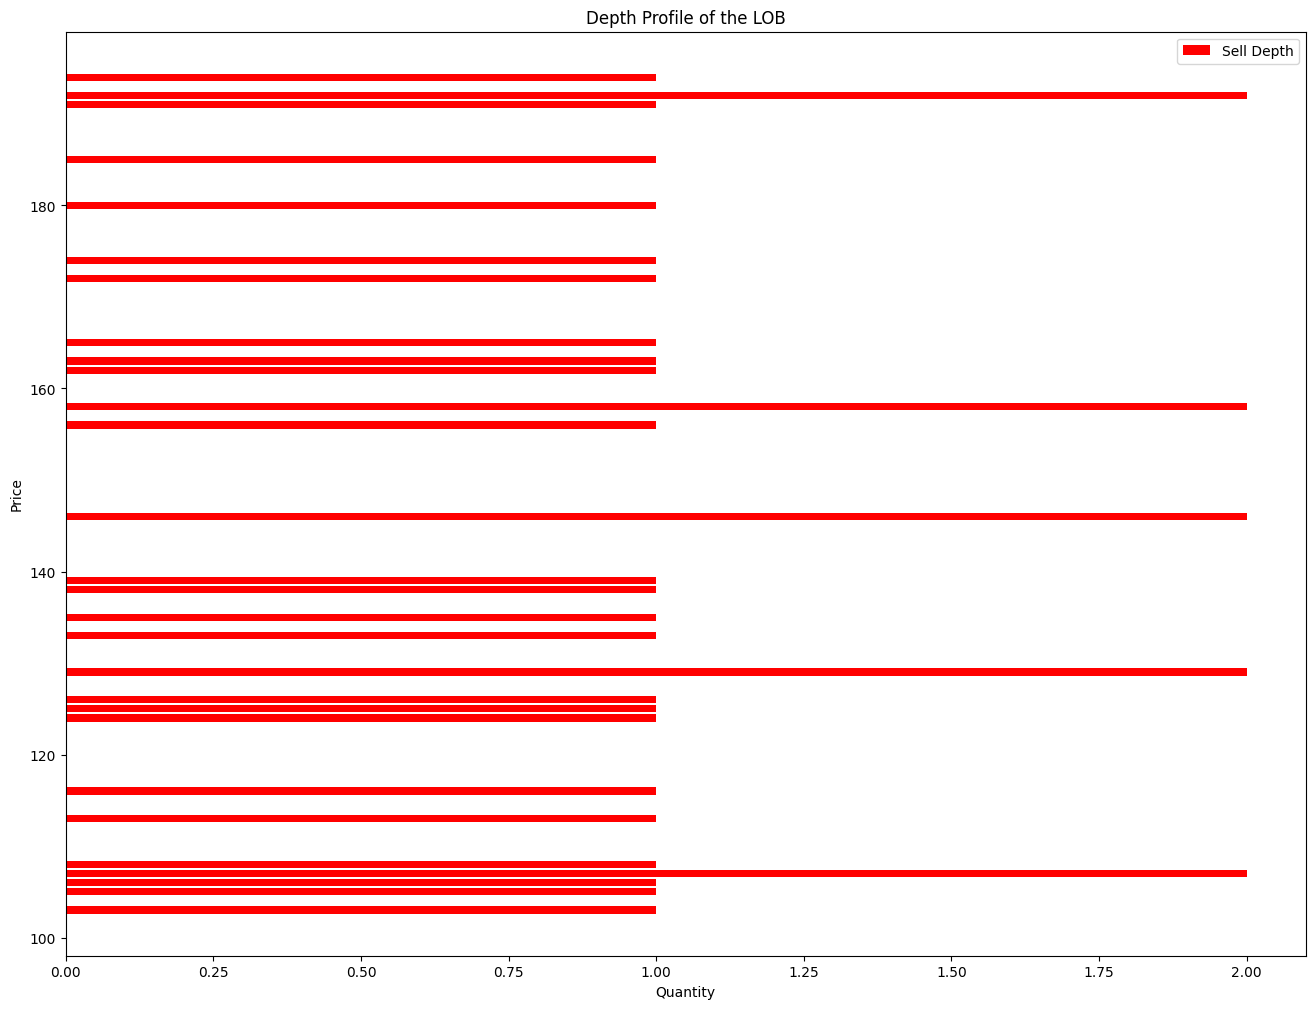

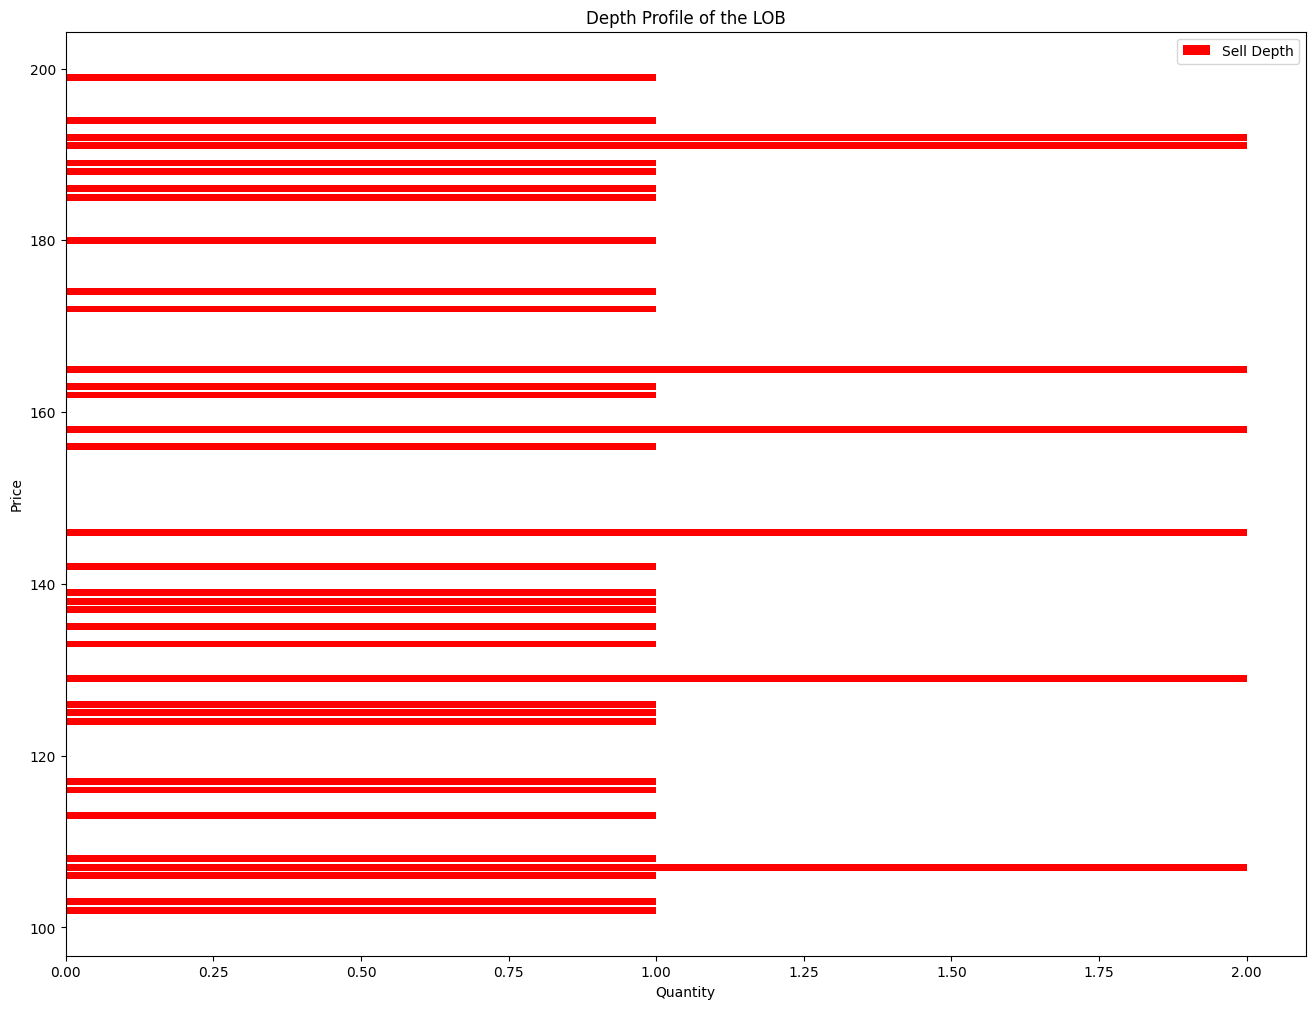

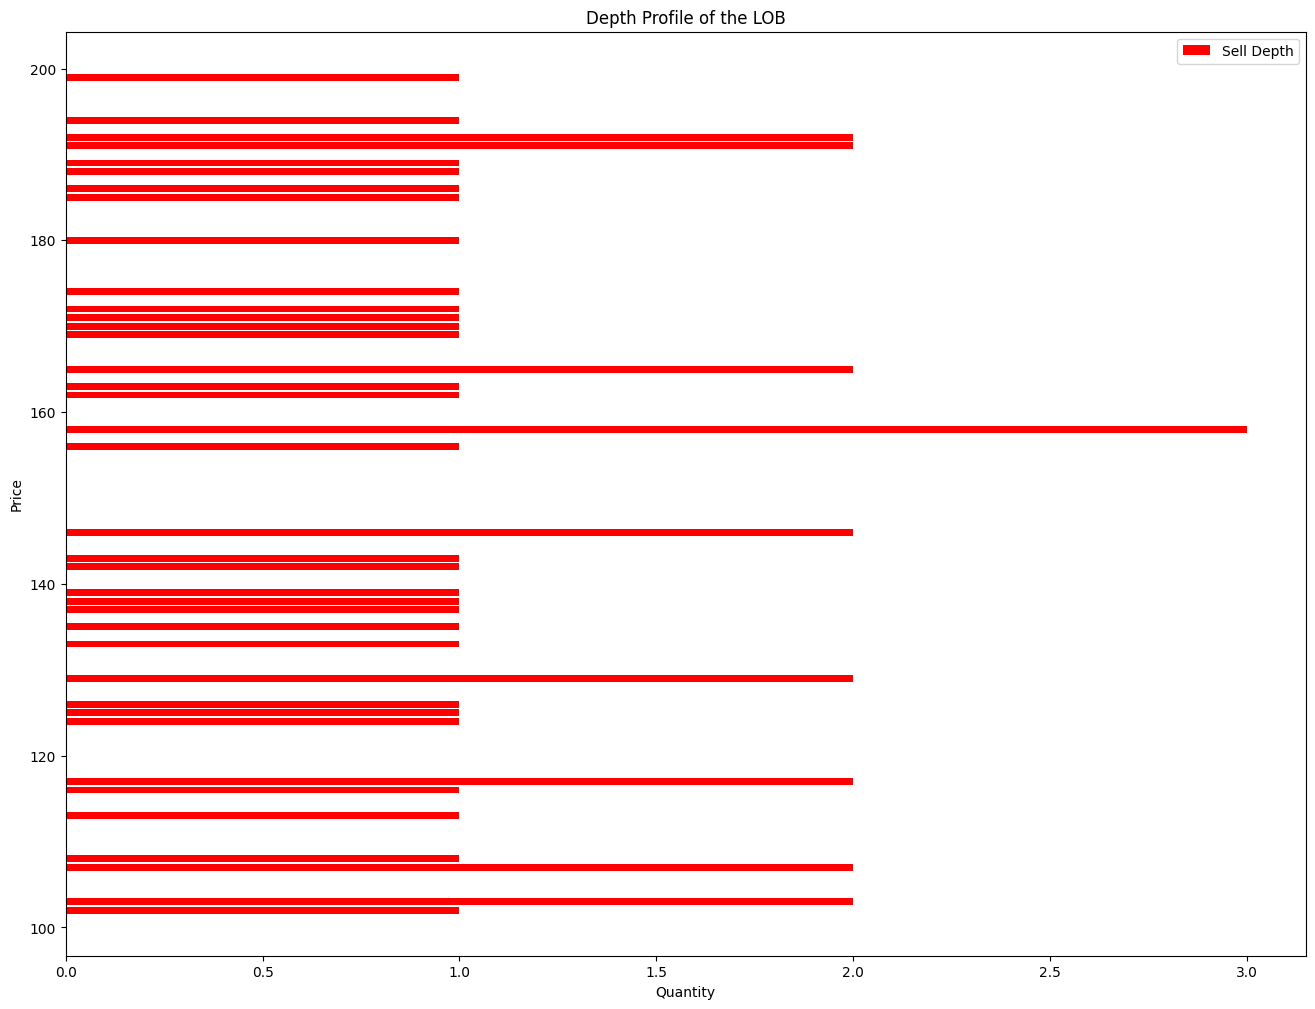

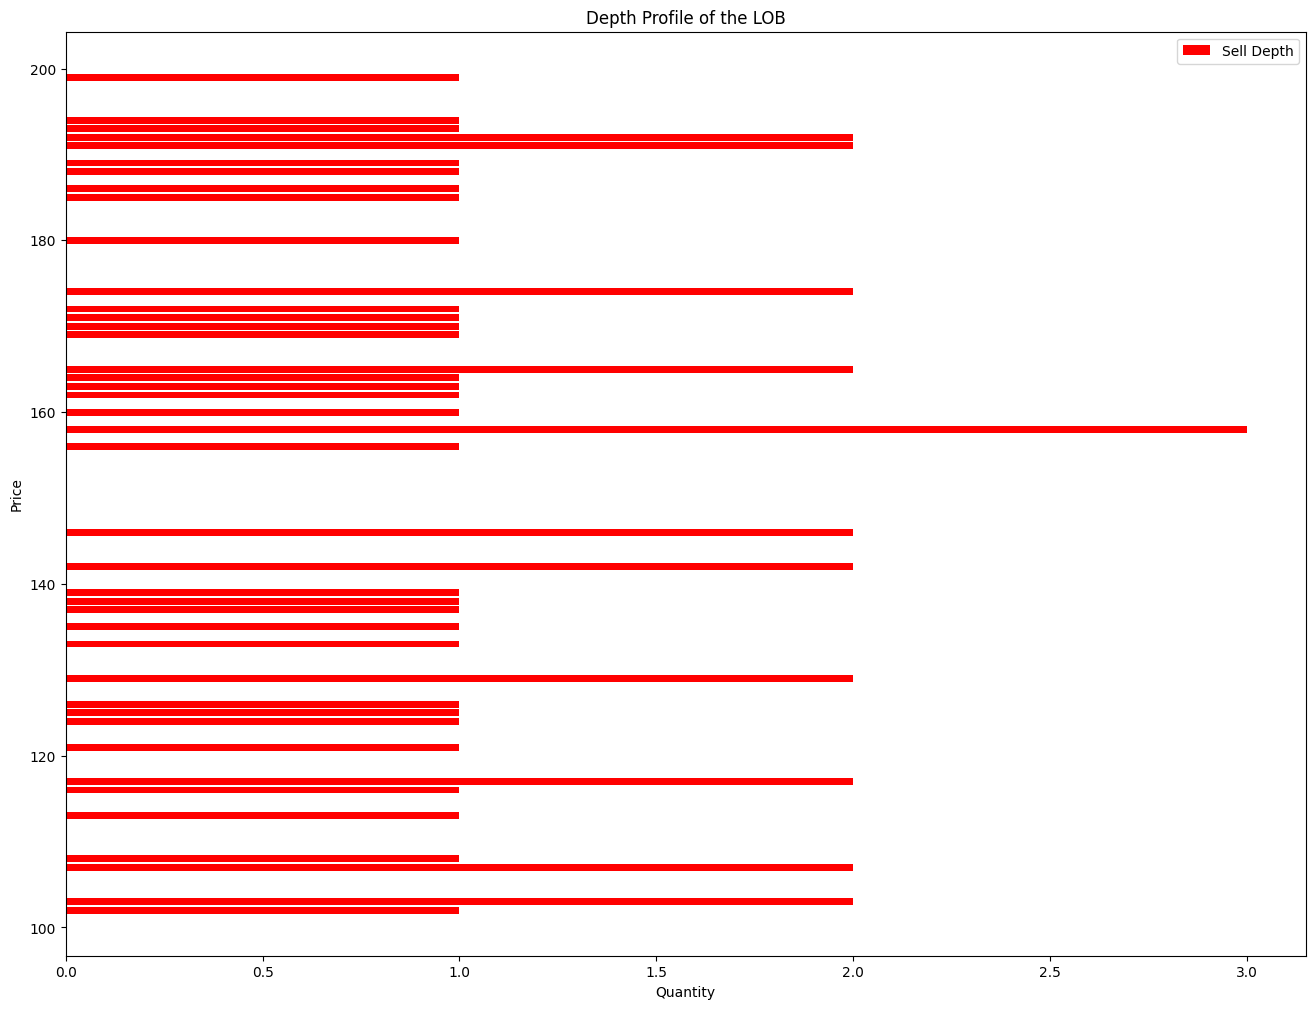

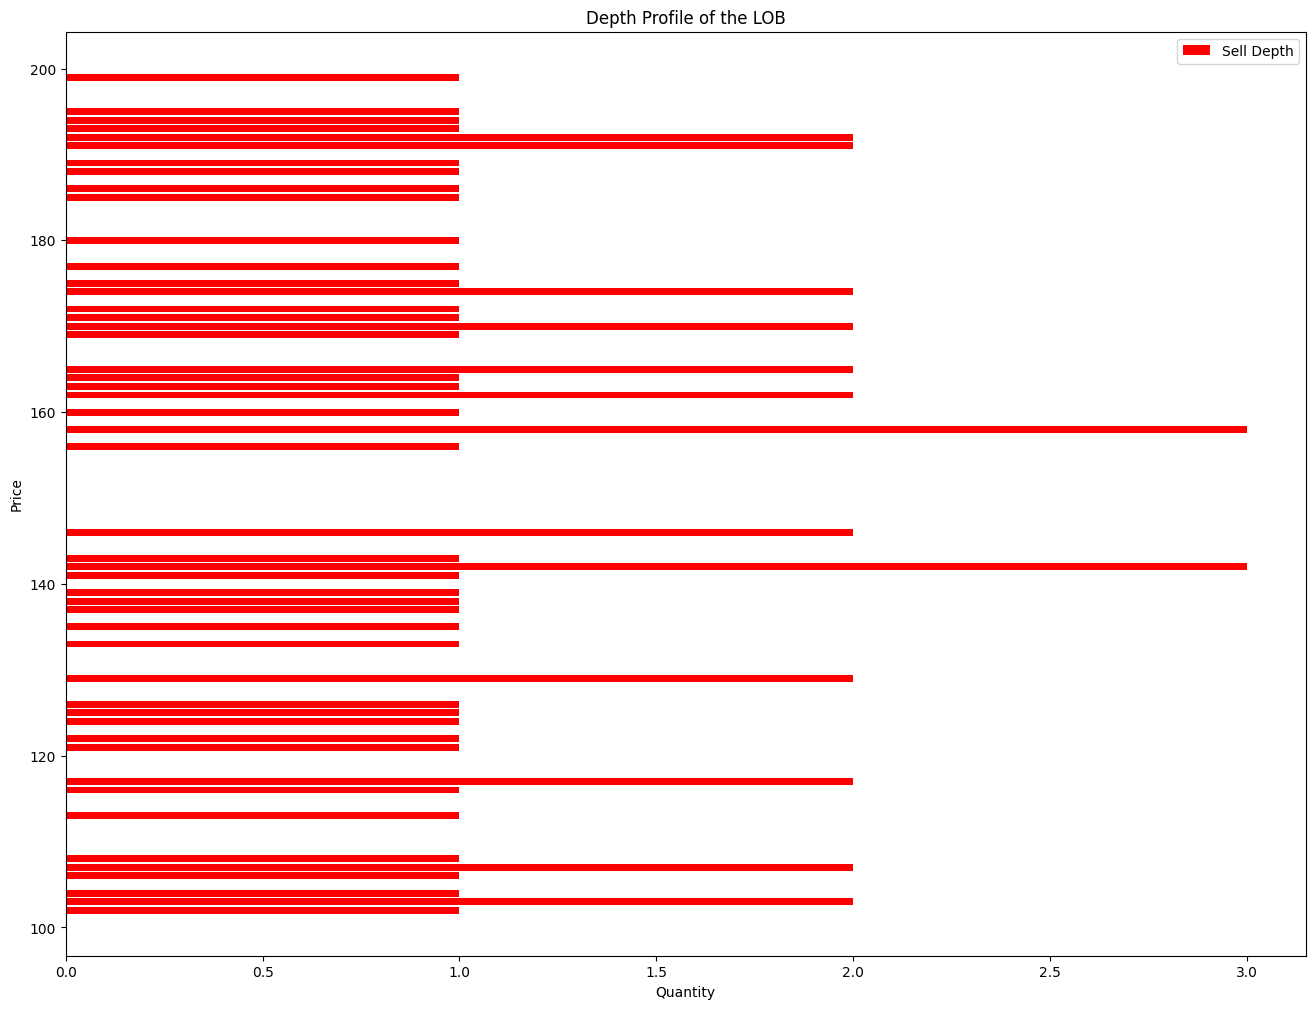

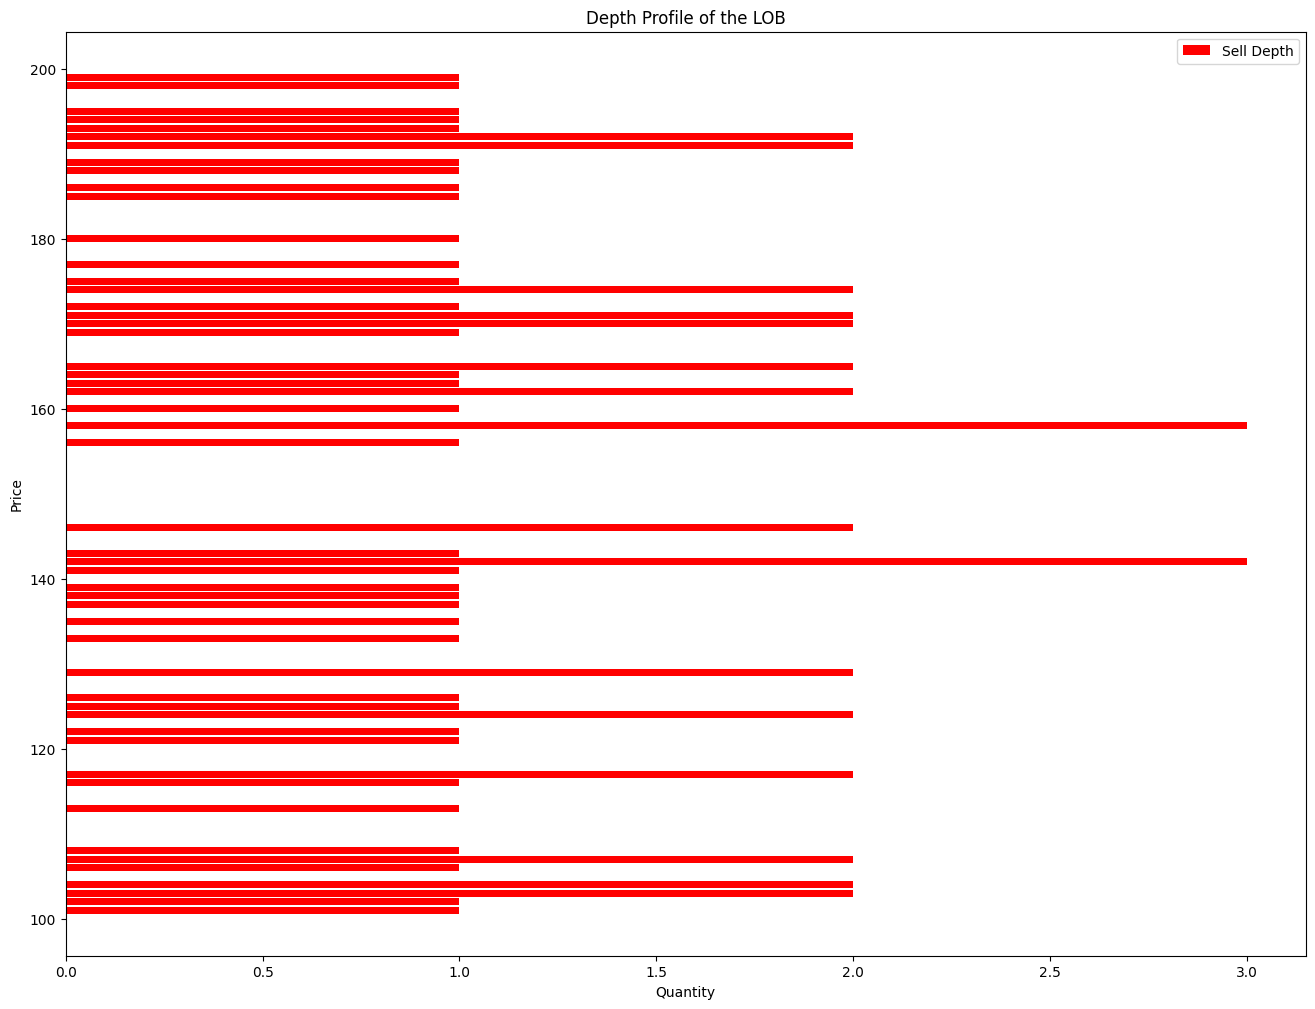

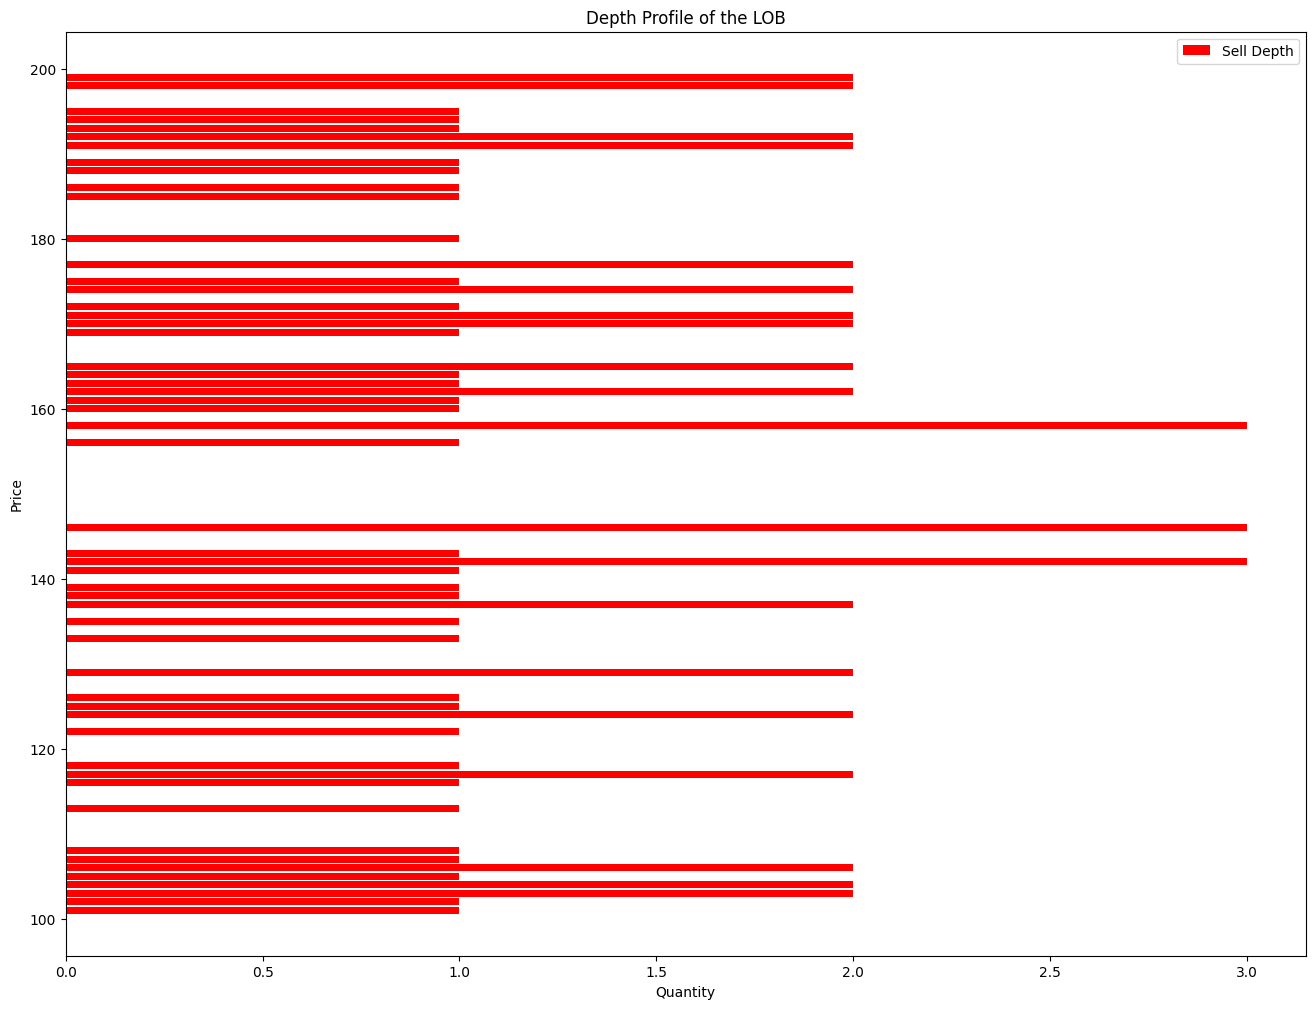

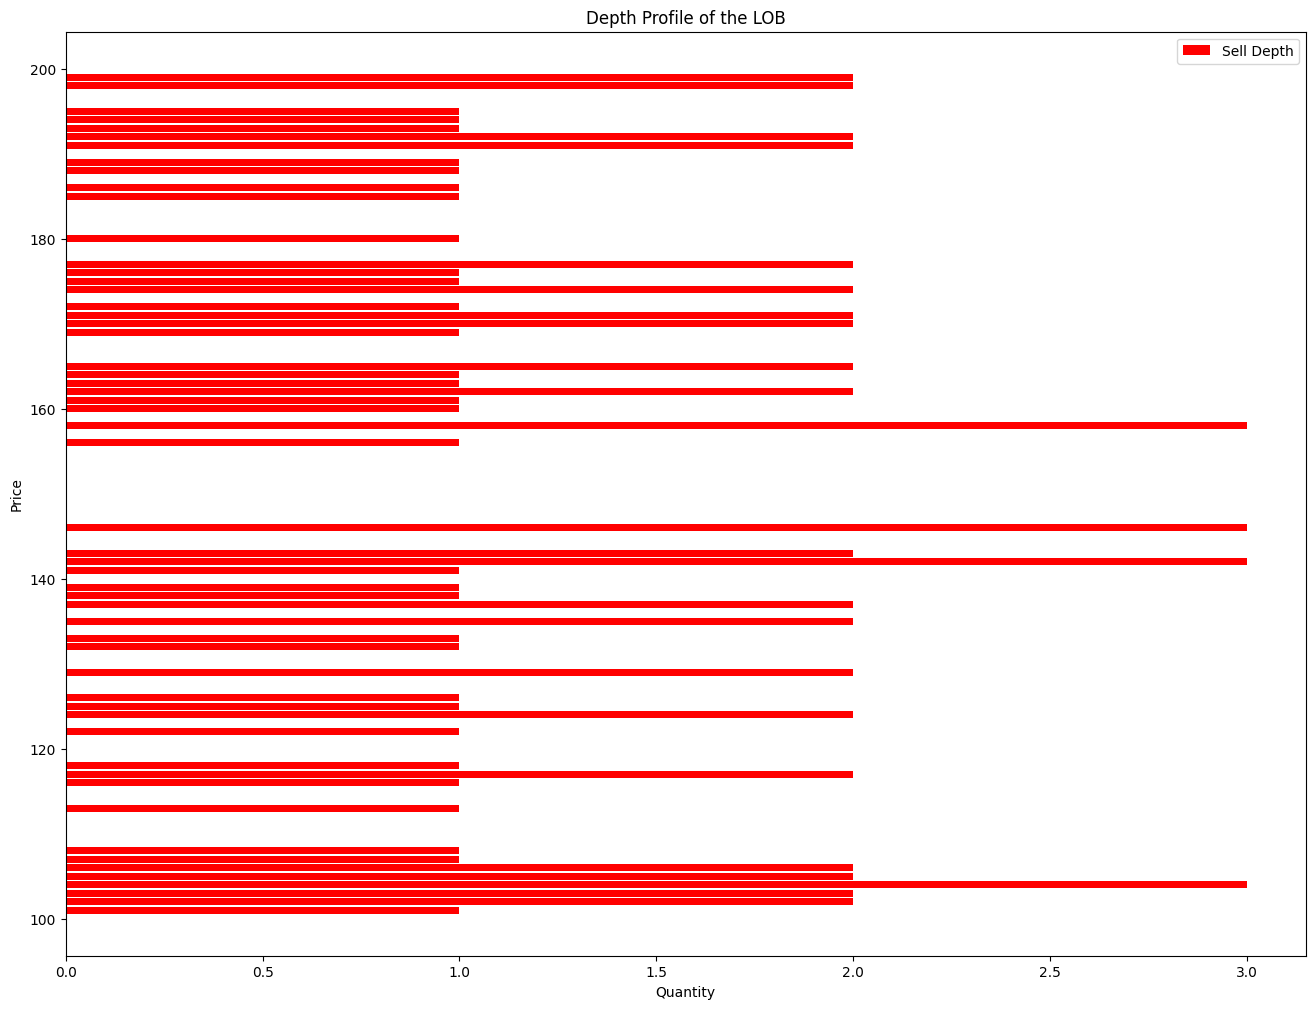

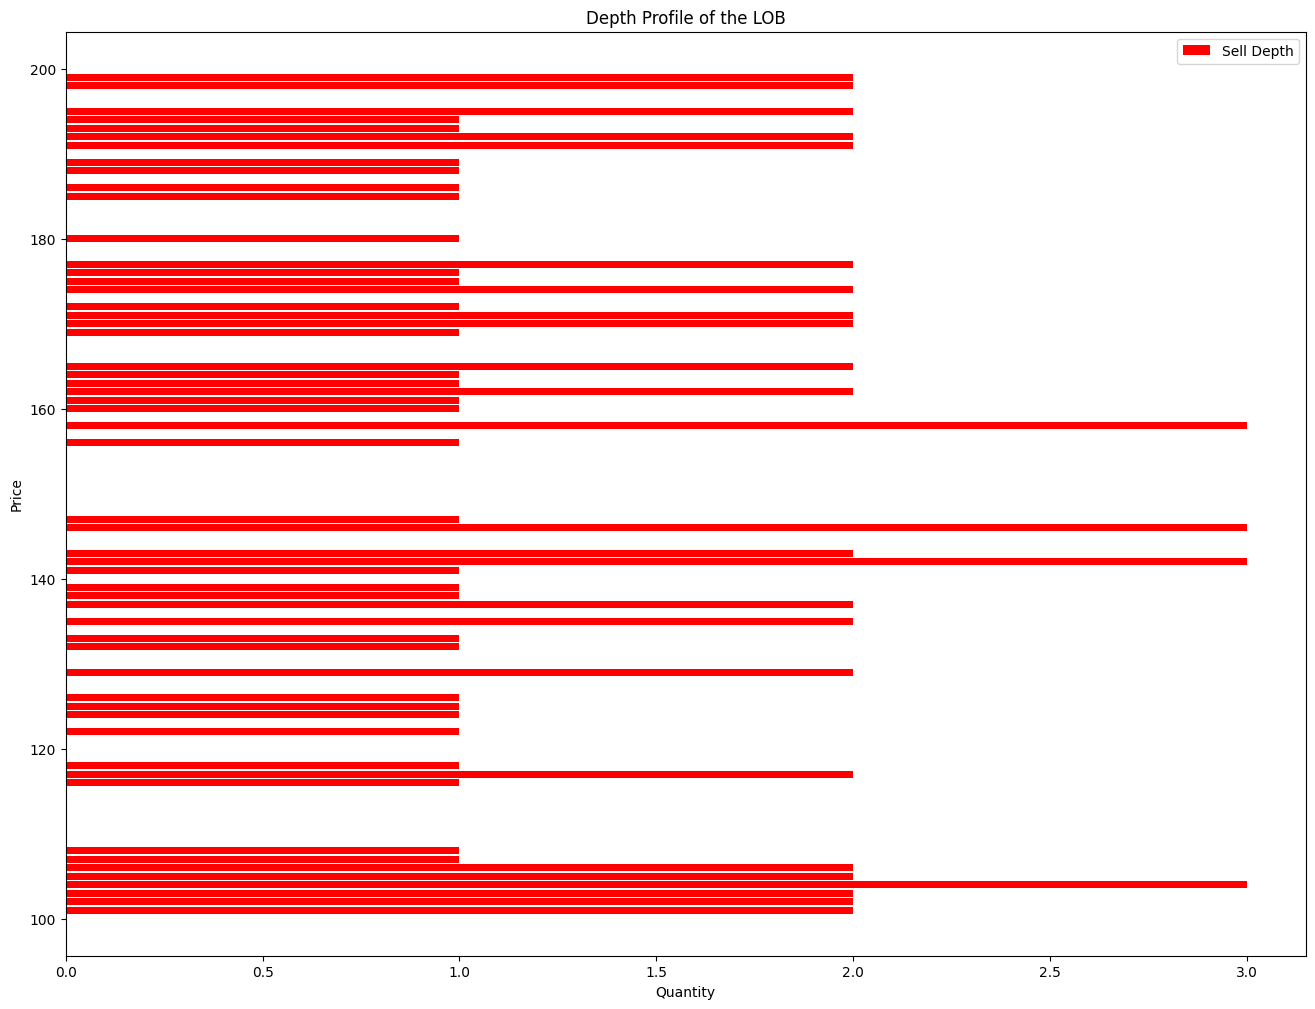

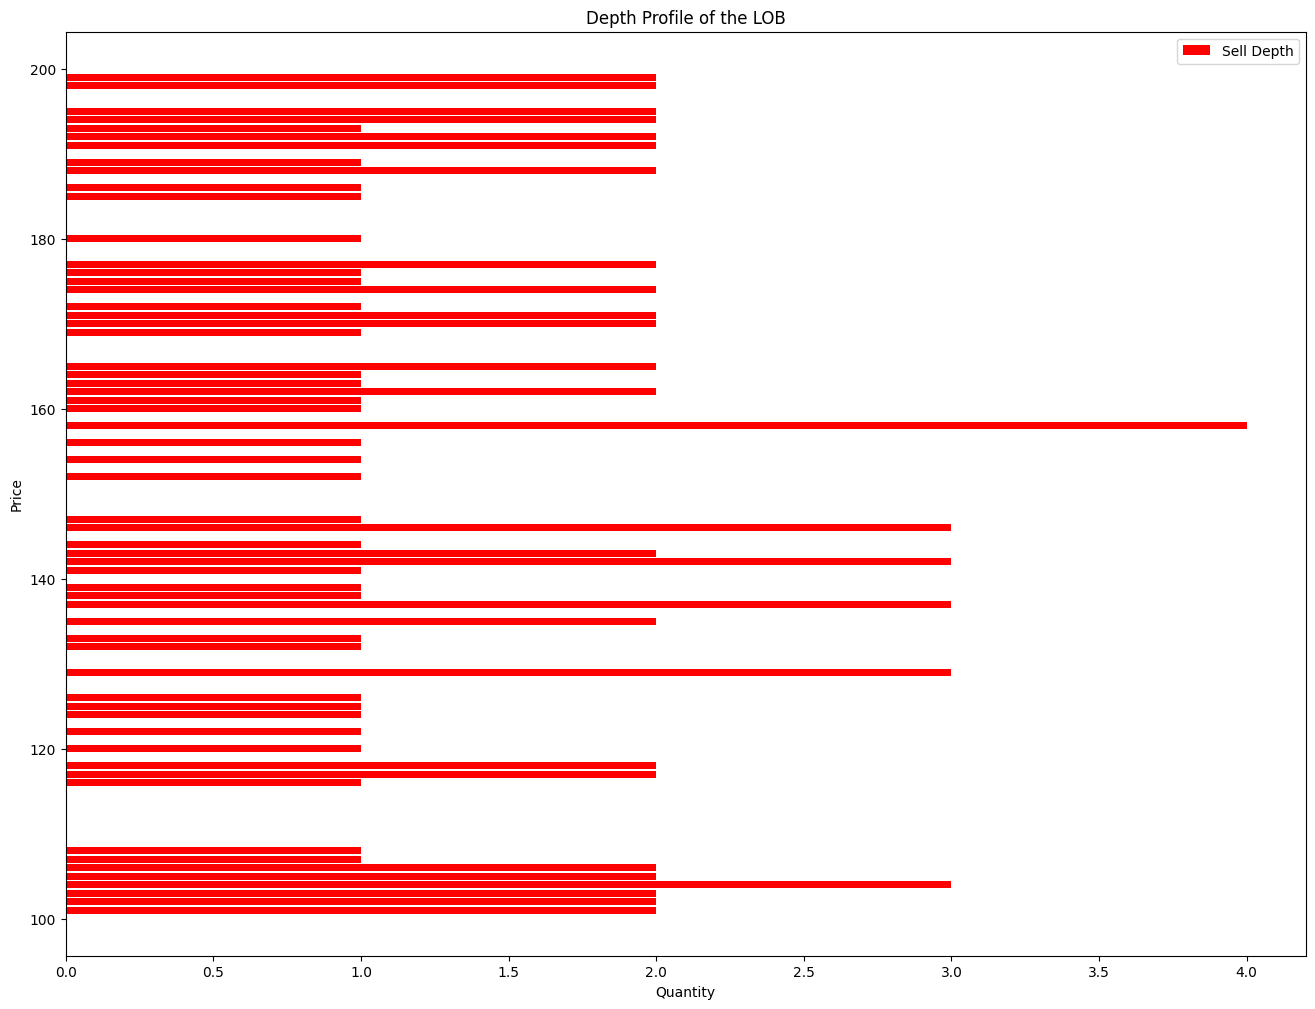

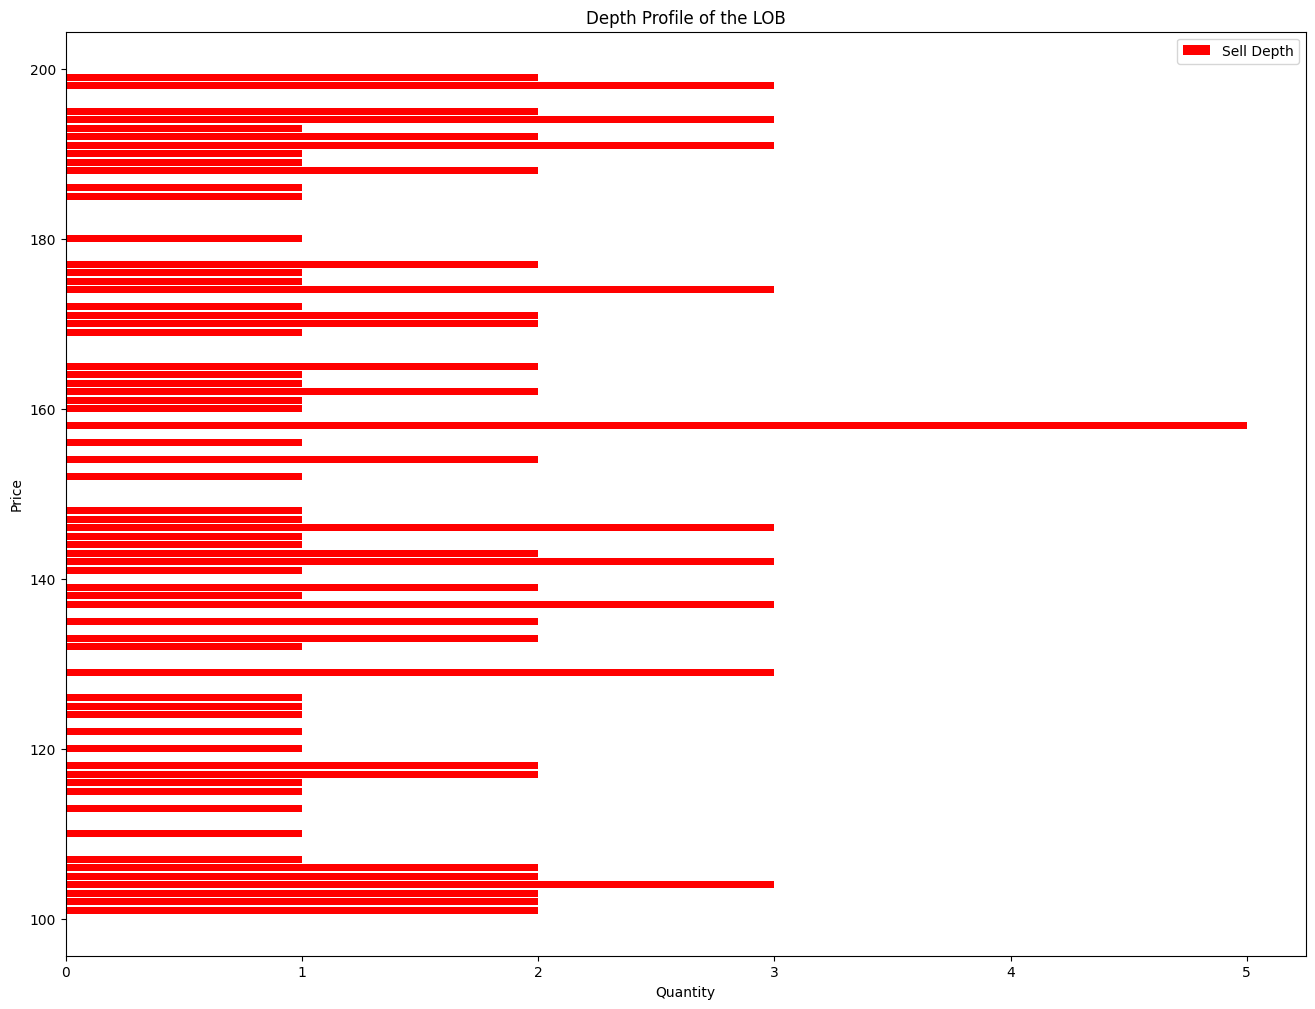

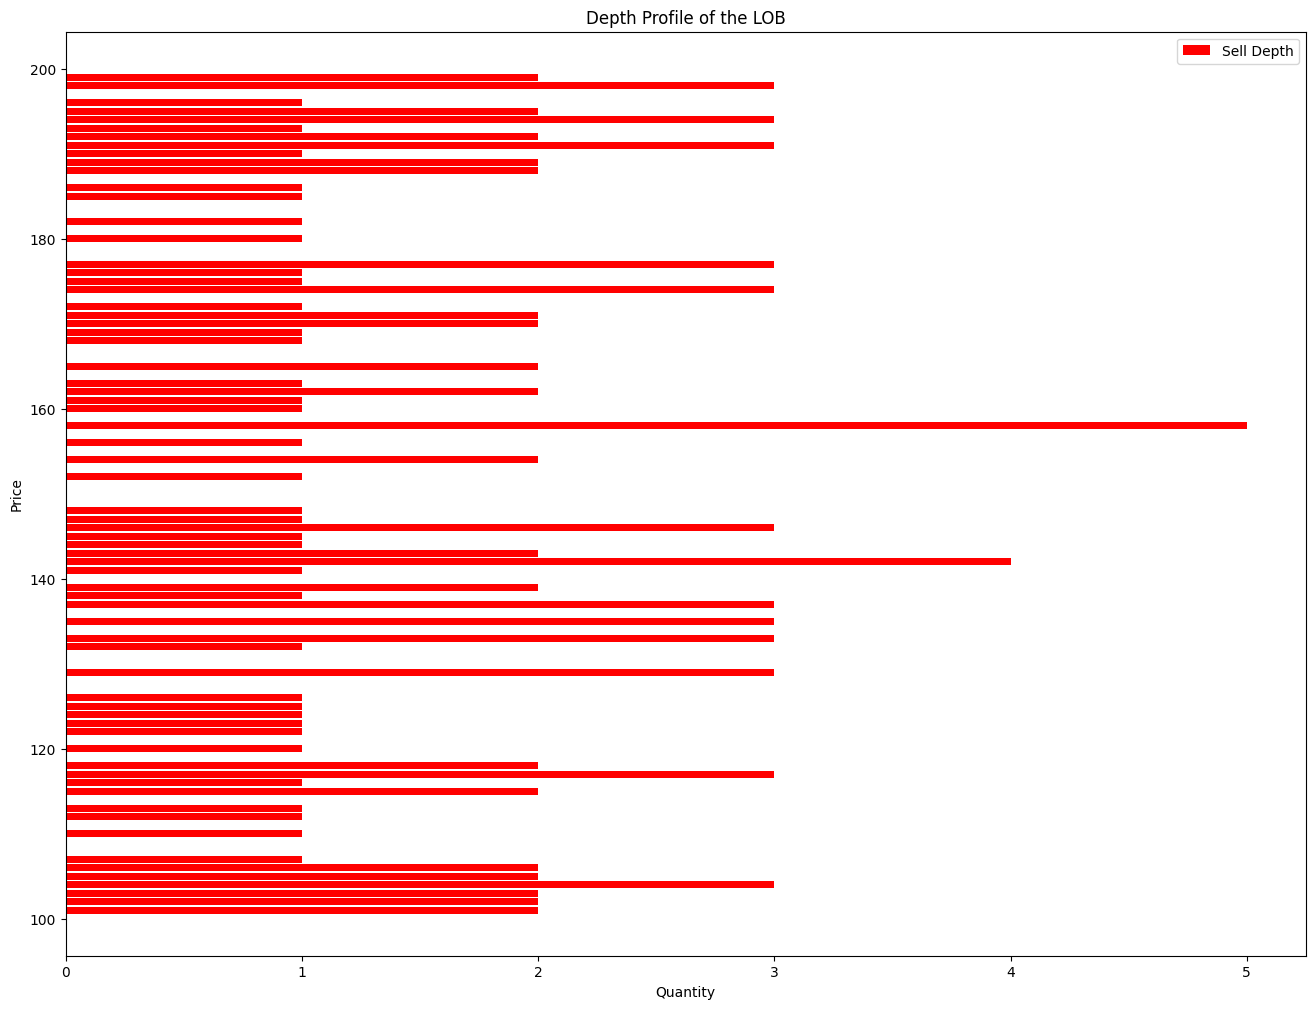

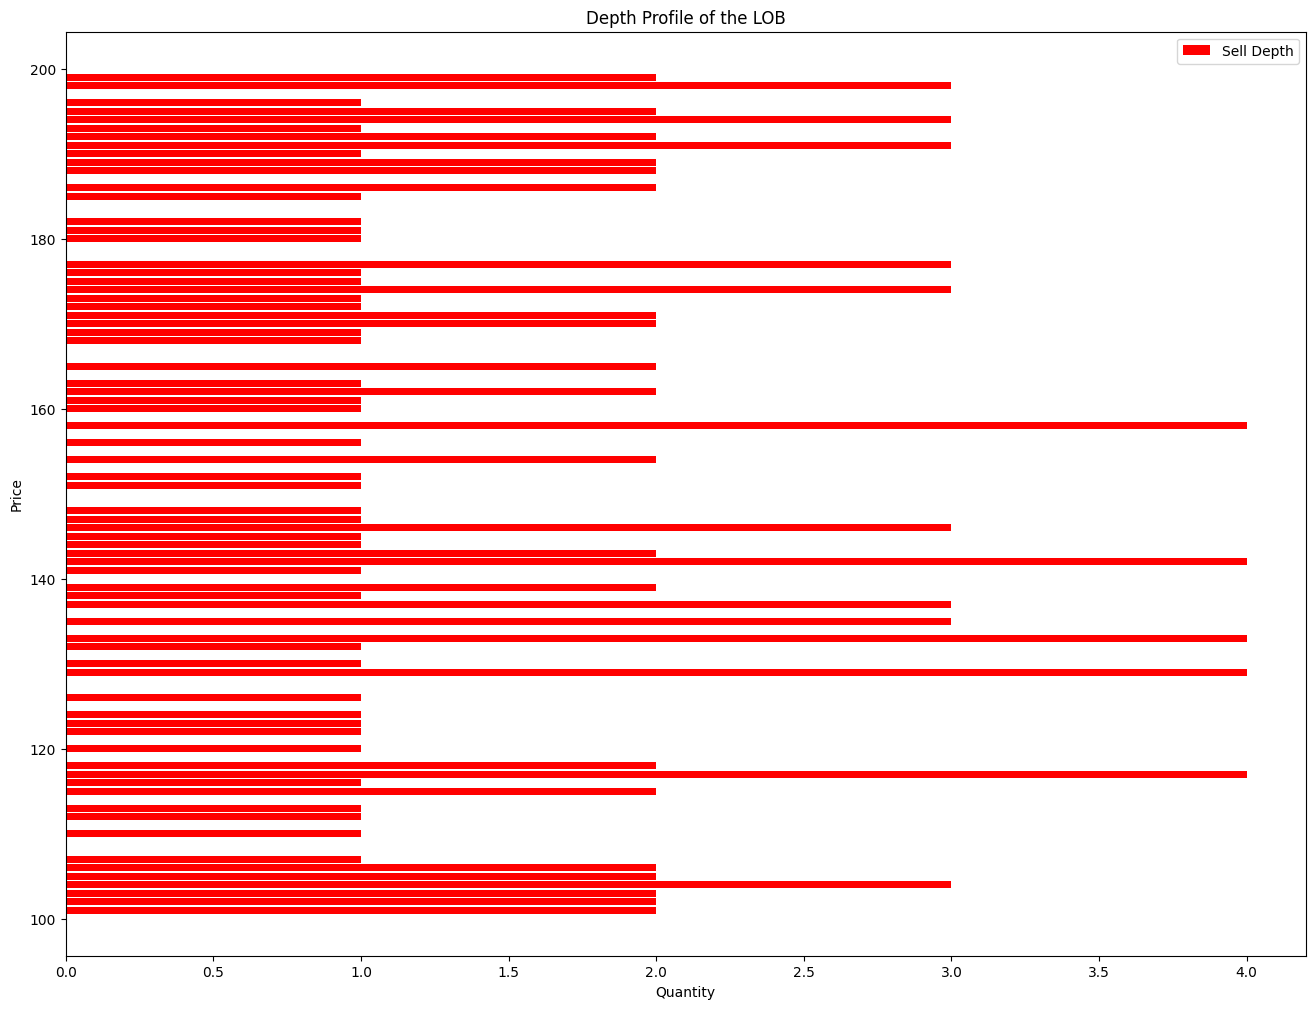

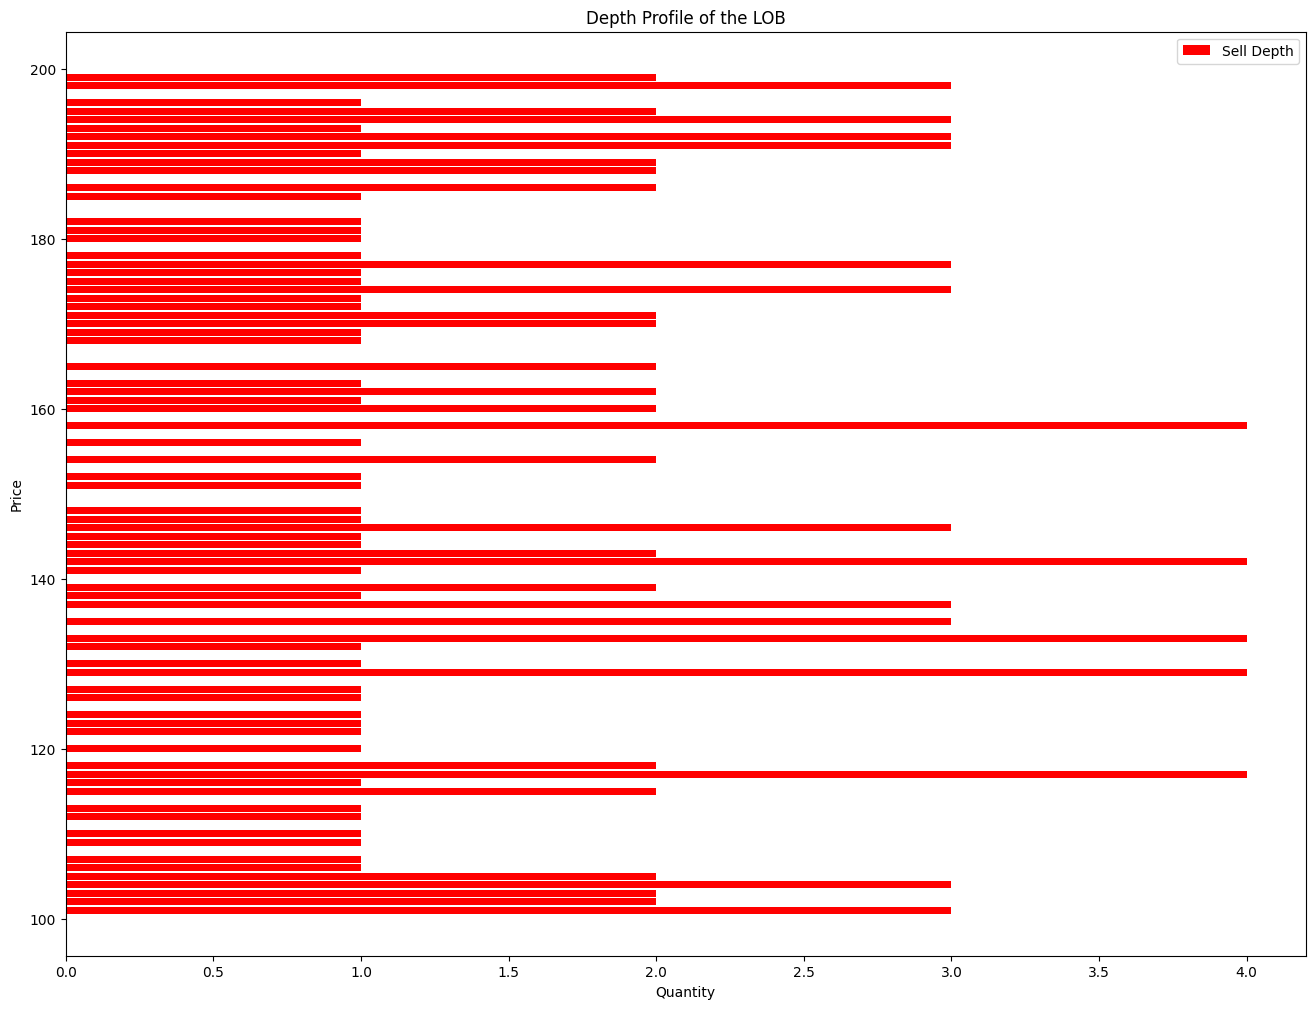

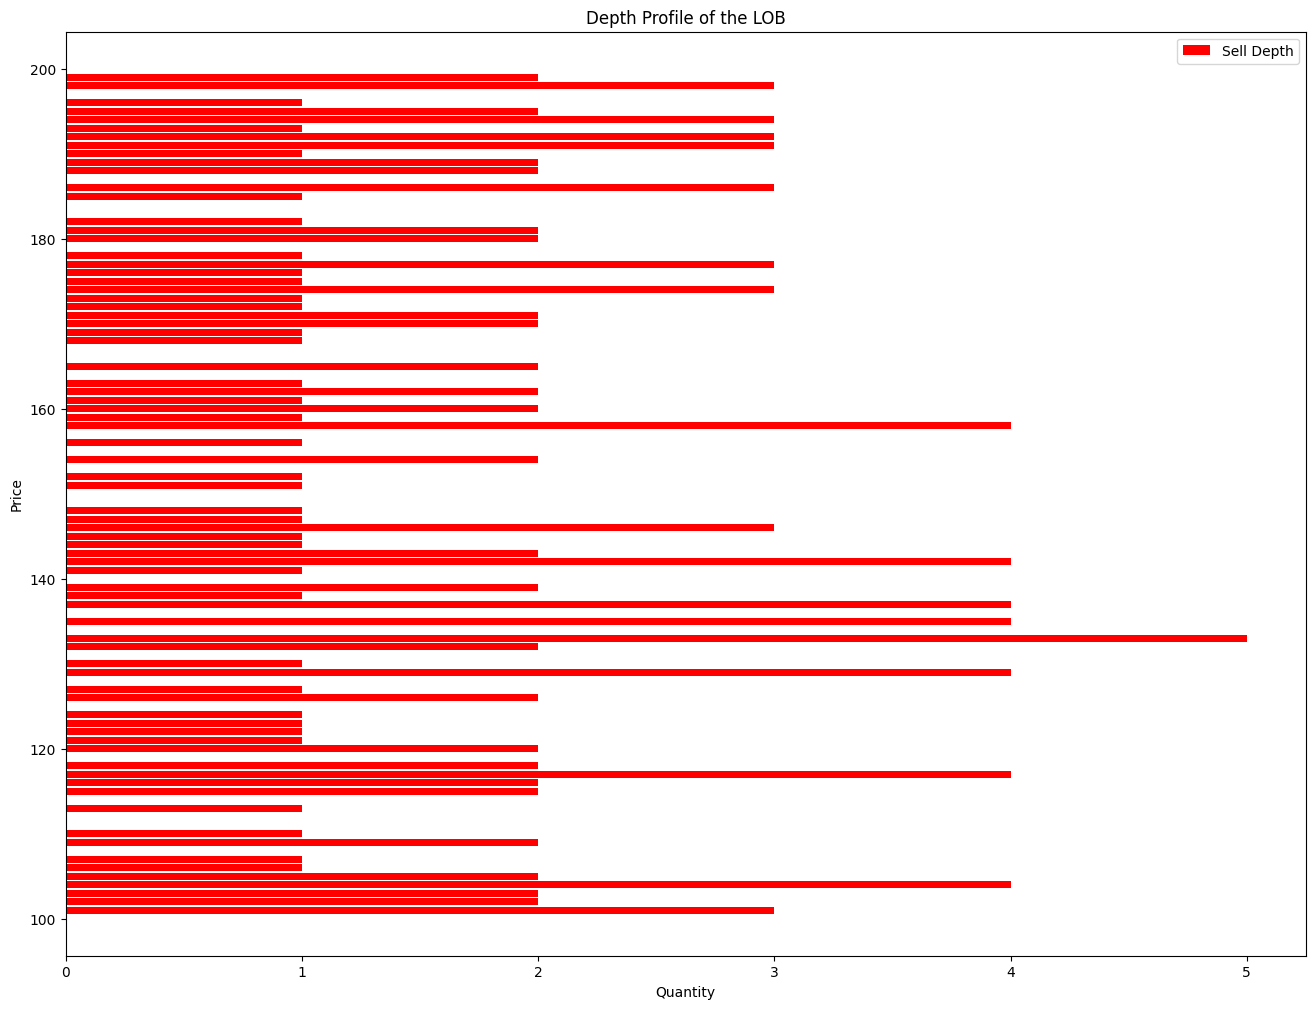

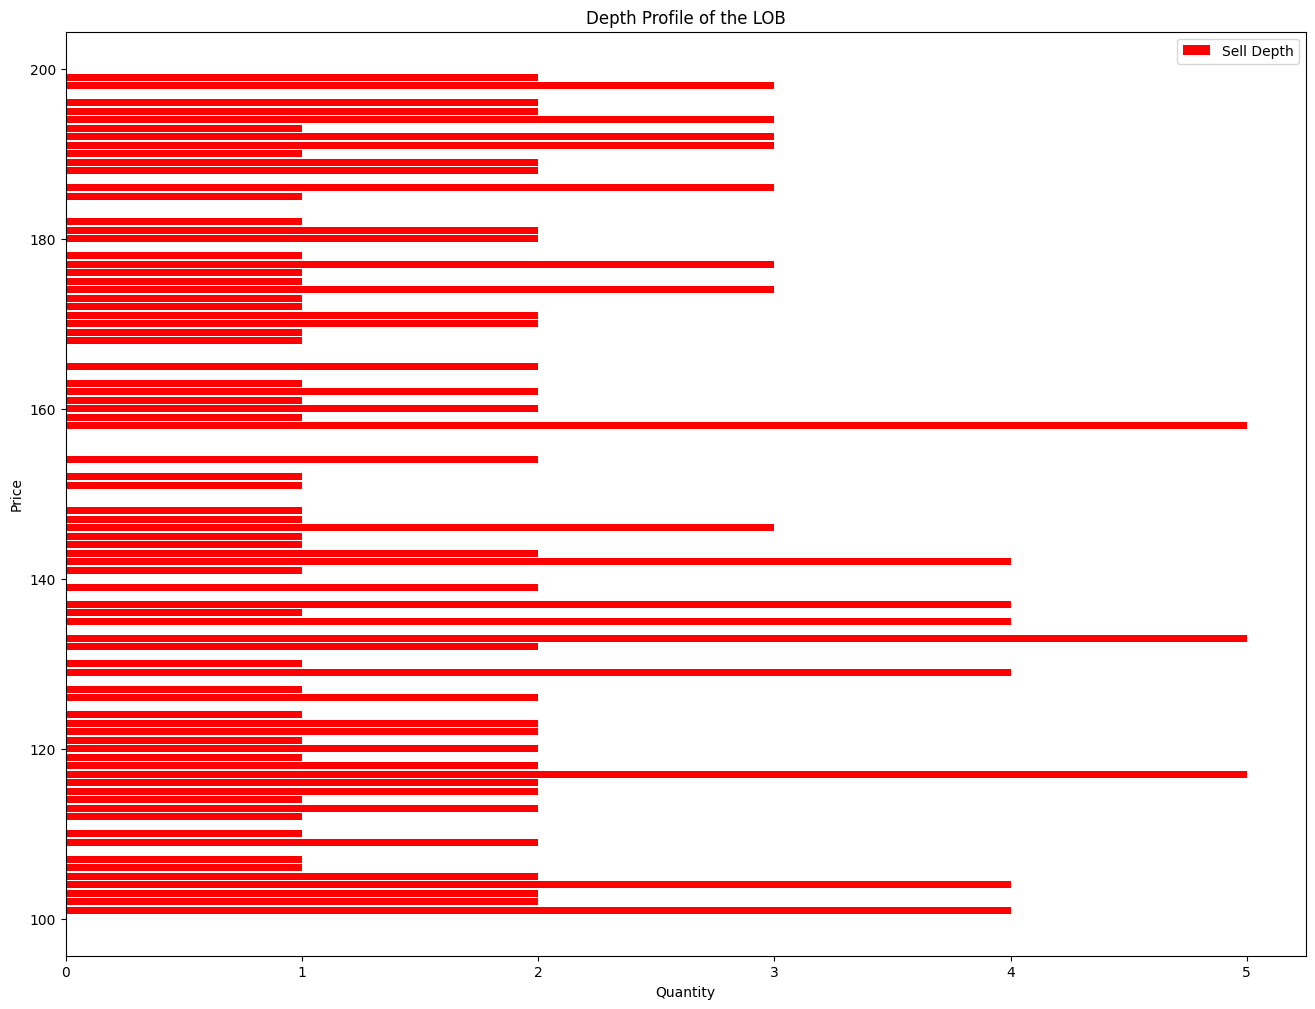

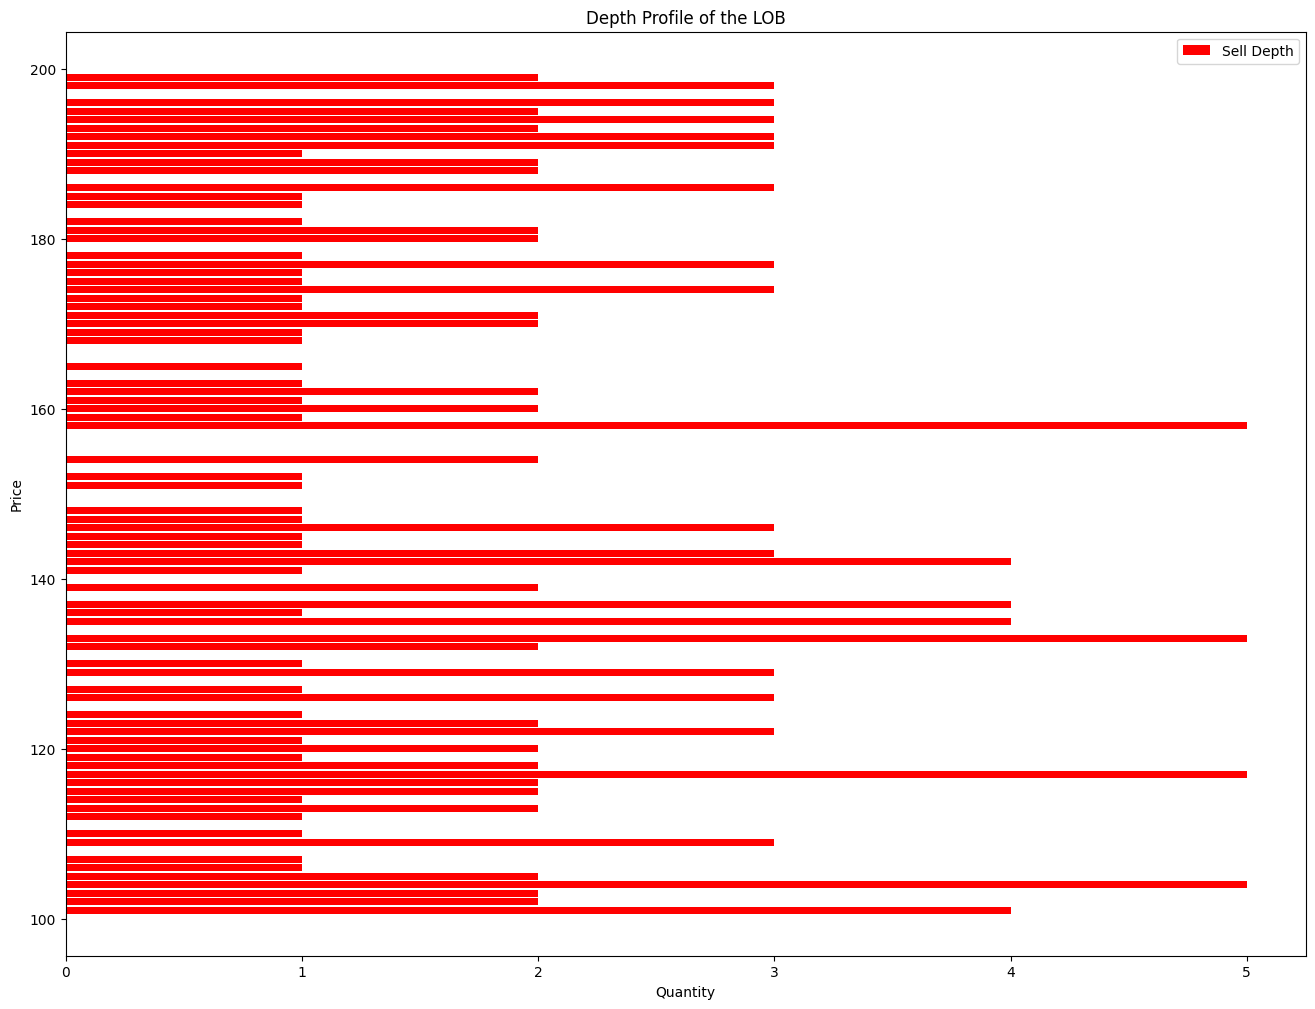

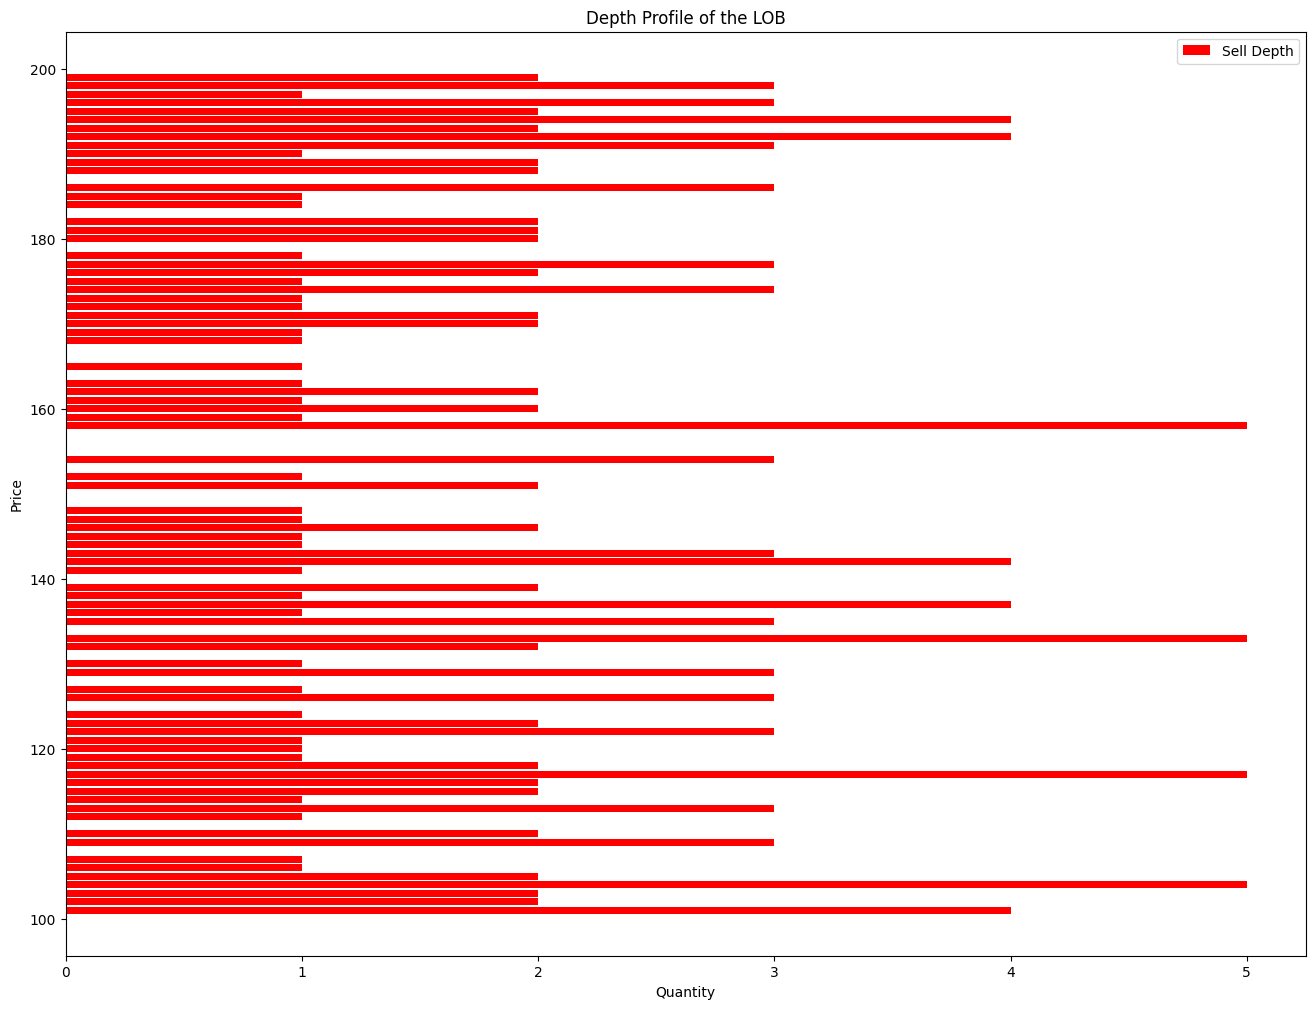

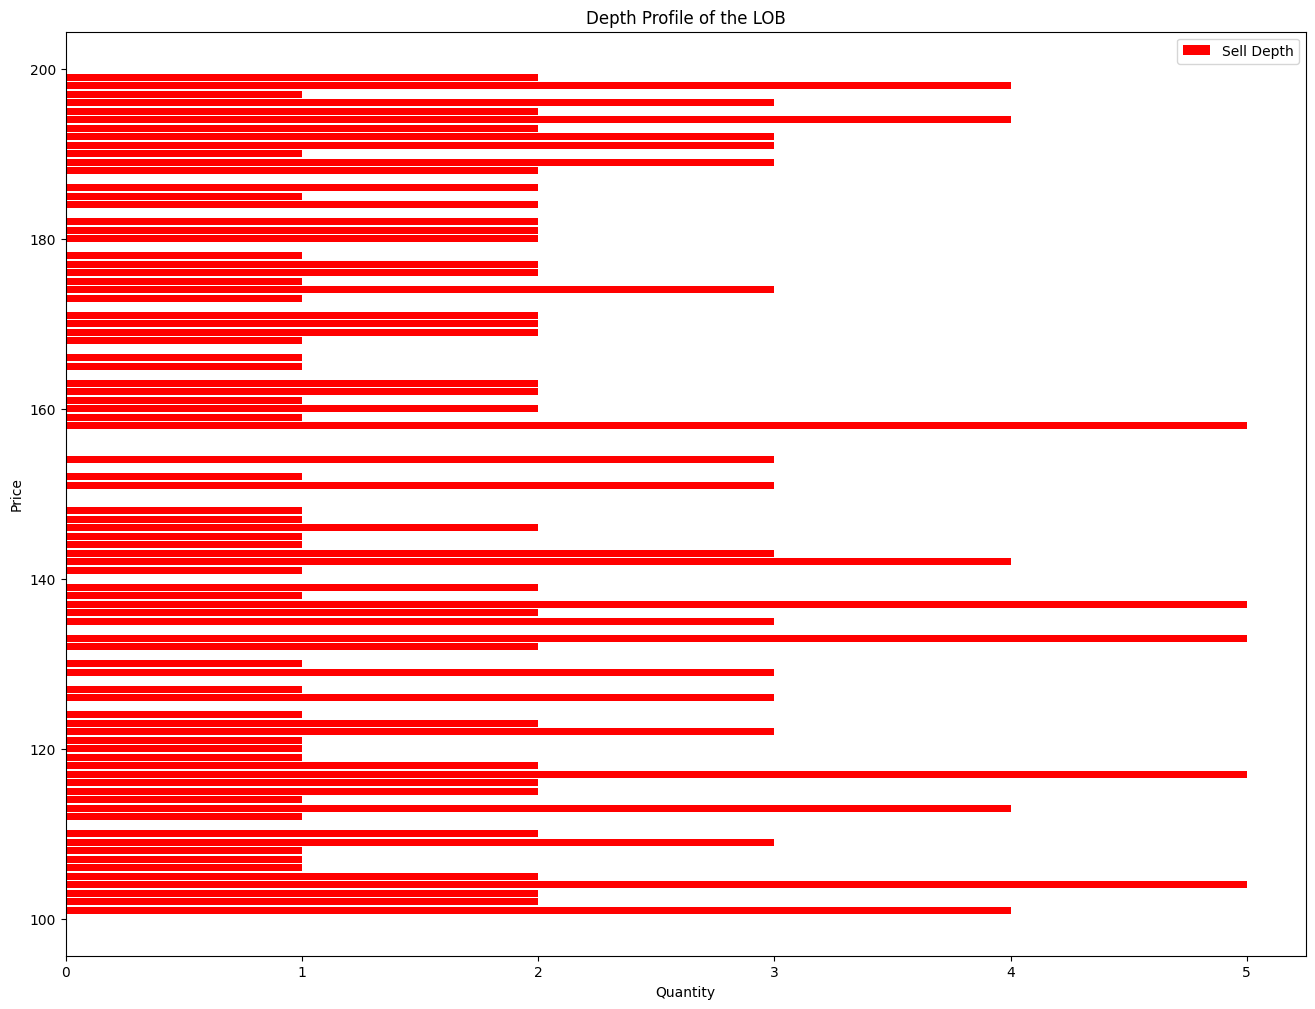

KeyboardInterrupt: 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Order:
    def __init__(self, order_type, price, quantity=1):
        self.order_type = order_type
        self.price = price
        self.quantity = quantity

class LimitOrderBook:
    def __init__(self, lambda_rate, mu_rate, nu_rate):
        self.lambda_rate = lambda_rate
        self.mu_rate = mu_rate
        self.nu_rate = nu_rate
        self.buy_orders = []
        self.sell_orders = []
        self.spread_history = []

    def simulate_step(self):
        # Cancel orders
        self.buy_orders = [o for o in self.buy_orders if np.random.poisson(self.nu_rate) == 0]
        self.sell_orders = [o for o in self.sell_orders if np.random.poisson(self.nu_rate) == 0]

        # Determine the current best bid and ask
        best_bid = max([o.price for o in self.buy_orders], default=0)
        best_ask = min([o.price for o in self.sell_orders], default=float('inf'))


        # Submit new limit orders
        # Buy orders can be placed up to the current best ask price
        if best_ask > best_bid:
            for price in range(best_bid + 1, min(int(best_ask), 200)):  # Ensure price is an integer and within bounds
                if np.random.poisson(self.lambda_rate):
                    self.buy_orders.append(Order('buy', price))

        
        # Sell orders can be placed down to the current best bid price
        if best_ask > best_bid:
            for price in range(max(best_bid + 1, 101), 200):  # Adjust lower bound to prevent overlap with buy orders
                if np.random.poisson(self.lambda_rate):
                    self.sell_orders.append(Order('sell', price))


        # Execute market orders
        if np.random.poisson(self.mu_rate) > 0 and self.sell_orders:
            self.sell_orders.pop(0)  # Remove the lowest sell order
        if np.random.poisson(self.mu_rate) > 0 and self.buy_orders:
            self.buy_orders.pop()  # Remove the highest buy order

        # Record the spread
        if best_bid > 0 and best_ask < float('inf'):
            self.spread_history.append(best_ask - best_bid)

    def plot_depth_profile(self):
     buy_depth = {}
     sell_depth = {}
    
     for order in self.buy_orders:
         buy_depth[order.price] = buy_depth.get(order.price, 0) + order.quantity
     for order in self.sell_orders:
         sell_depth[order.price] = sell_depth.get(order.price, 0) + order.quantity
    
     buy_prices, buy_quantities = zip(*sorted(buy_depth.items())) if buy_depth else ([], [])
     sell_prices, sell_quantities = zip(*sorted(sell_depth.items())) if sell_depth else ([], [])
    
     plt.figure(figsize=(16, 12))
    
  
    
     # Plotting sell depth
     plt.barh(sell_prices, sell_quantities, color='red', label='Sell Depth')
     
     # Plotting buy depth
     #plt.barh(buy_prices, buy_quantities, color='green', label='Buy Depth')
    
     plt.title('Depth Profile of the LOB')
     plt.xlabel('Quantity')
     plt.ylabel('Price')
     plt.legend()
     plt.show()
    def get_average_spread(self):
        return np.mean(self.spread_history) if self.spread_history else None
    def plot_spread_history(self):
        plt.figure(figsize=(12, 12))
        plt.plot(self.spread_history, label='Spread over time')
        plt.xlabel('Time Step')
        plt.ylabel('Spread')
        plt.title('Spread History')
        plt.legend()
        plt.show()

# Initialize the LOB
lob = LimitOrderBook(lambda_rate=0.1, mu_rate=0.5, nu_rate=0.01)

# Start with some initial buy and sell orders
lob.buy_orders = [Order('buy', price) for price in range(90, 95)]
lob.sell_orders = [Order('sell', price) for price in range(105, 110)]

# Simulate the LOB for a number of steps
for _ in range(50):
    lob.simulate_step()
    lob.plot_depth_profile()

# Plot the final depth profile and the spread history
lob.plot_spread_history()
average_spread = lob.get_average_spread()
print(f"Average spread over the simulation: {average_spread}")